# Step 0: run the following commands

```bash
mlwiz-data --config-file examples/DATA_CONFIGS/config_NCI1.yml
mlwiz-exp --config-file examples/MODEL_CONFIGS/config_DGN.yml [--debug]
```

## Step 1: retrieve the experiments for a specific model selection folder

In [2]:
from mlwiz.evaluation.util import retrieve_experiments, create_dataframe

outer_fold_id = 1
model_selection_folder = f'RESULTS/dgn_NCI1/MODEL_ASSESSMENT/OUTER_FOLD_{outer_fold_id}/MODEL_SELECTION/'

config_list = retrieve_experiments(model_selection_folder)

## Step 2: Create DataFrame object by focusing on some hyper-parameter

In [3]:
configs_df = create_dataframe(config_list=config_list,
                              hyperparameters=[("dim_embedding", int), ("num_layers", int), 
                                               ("lr", float), ("avg_validation_score", float)])
configs_df

,dim_embedding,num_layers,lr,avg_validation_score
0,5,2,0.010,49.963503
1,5,2,0.010,49.963503
2,5,2,0.010,49.963503
3,5,2,0.010,49.963503
4,5,2,0.001,49.927006
5,5,2,0.001,49.927006
6,5,2,0.001,49.927006
7,5,2,0.001,49.927006


## Step 3: Plot data using DataFrame (requires additional libraries to be installed)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='lr', ylabel='avg_validation_score'>

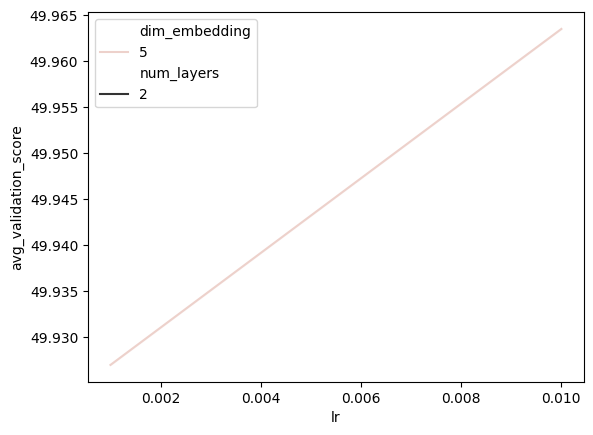

In [7]:
sns.lineplot(configs_df, x='lr', y='avg_validation_score', hue='dim_embedding', style='num_layers')

## Bonus: Putting together more outer folds

<Axes: xlabel='lr', ylabel='avg_validation_score'>

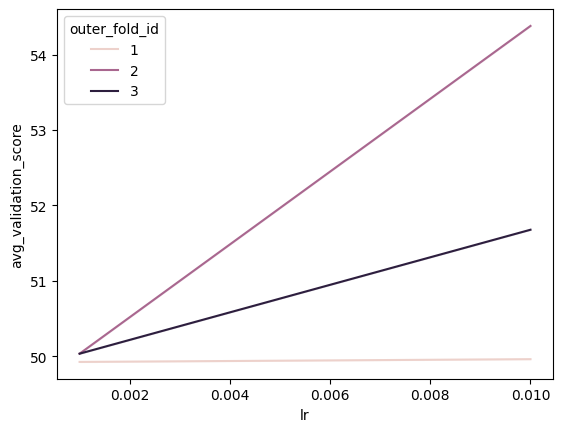

In [14]:
config_list = []

# Concat all configuration results for each outer fold, but add a fold id to recognize the same configuration across different folds
for outer_fold_id in range(1, 4):
    model_selection_folder = f'RESULTS/dgn_NCI1/MODEL_ASSESSMENT/OUTER_FOLD_{outer_fold_id}/MODEL_SELECTION/'

    tmp_list = retrieve_experiments(model_selection_folder)
    for cfg in tmp_list:
        cfg["outer_fold_id"] = outer_fold_id

    config_list += tmp_list

configs_df = create_dataframe(config_list=config_list,
                              hyperparameters=[("dim_embedding", int), ("num_layers", int), 
                                               ("lr", float), ("avg_validation_score", float),
                                               ("outer_fold_id", int)])

sns.lineplot(configs_df, x='lr', y='avg_validation_score', hue='outer_fold_id')